In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree     import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.metrics         import accuracy_score, classification_report, confusion_matrix, recall_score
from yellowbrick.classifier  import ConfusionMatrix

In [11]:
with open("data_balanced_smote.pkl", 'rb') as f:
    x_train, x_test, y_train, y_test = pickle.load(f)

<IPython.core.display.Javascript object>

In [12]:
x_train.shape, y_train.shape

((34992, 23), (34992,))

In [13]:
x_test.shape, y_test.shape

((7500, 23), (7500,))

In [14]:
x_train.head()

,LIMIT_BAL,GENDER,EDUCATION,MARITAL STATUS,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,130000,2.0,1.0,2.0,27,0.0,0.0,0.0,0.0,0.0,...,29710,34310,21900,780,2000,2000,5000,438,780,0
1,130000,2.0,3.0,1.0,53,0.0,0.0,0.0,0.0,0.0,...,22386,24296,25436,27451,2343,2386,2296,1536,2451,2659
2,140000,1.0,3.0,1.0,38,2.0,2.0,2.0,2.0,2.0,...,127701,135551,135859,134687,22500,0,10000,2600,2300,5300
3,270000,2.0,2.0,1.0,33,-1.0,-1.0,-1.0,-1.0,-1.0,...,3567,1556,7952,10794,8874,3567,1556,7952,4000,2000
4,220000,2.0,2.0,1.0,53,2.0,0.0,0.0,0.0,0.0,...,223193,215040,210884,210479,8490,8100,8000,7804,8254,6640


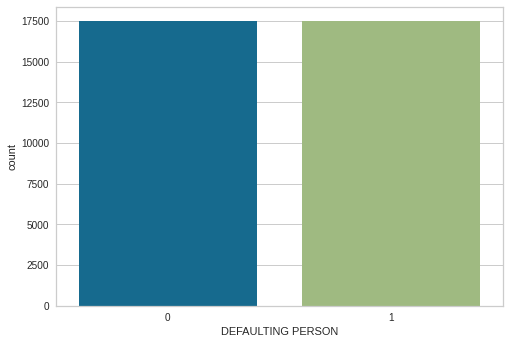

In [15]:
sns.countplot(x = y_train);

# MACHINE LEARNING

In [16]:
version3_accuracy = [] # version3 = [tree, random_forest, knn] for accuracy
version3_recall = [] # version3 = [tree, random_forest, knn] for recall

# Decision Tree

In [17]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
v3_tree = tree.predict(x_test)

In [18]:
version3_accuracy.append( accuracy_score(y_test, v3_tree) )
version3_recall.append( recall_score(y_test, v3_tree, pos_label='1') )

ValueError: pos_label=1 is not a valid label. It should be one of ['0', '1']

In [29]:
print(classification_report(y_test, v3_tree))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      5868
           1       0.37      0.41      0.39      1632

    accuracy                           0.72      7500
   macro avg       0.60      0.61      0.61      7500
weighted avg       0.73      0.72      0.73      7500



In [30]:
cf_tree = confusion_matrix(y_test, v3_tree)

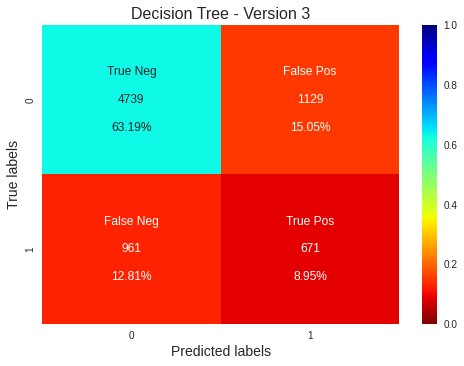

In [31]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

group_counts = ["{:0.0f}".format(value) for value in cf_tree.flatten()]

group_percentage = ["{0:0.2%}".format(value) for value in cf_tree.flatten()/np.sum(cf_tree)]

labels = [f"{v1}\n\n{v2}\n\n{v3}" for v1,v2,v3 in zip(group_names, group_counts, group_percentage)]

labels = np.asarray(labels).reshape(2,2)

ax = plt.subplot()



sns.heatmap(cf_tree/np.sum(cf_tree), annot=labels, fmt='', cmap = 'jet_r', vmin = 0, vmax = 1, ax = ax)

ax.set_xlabel('Predicted labels', fontsize = 14)
ax.set_ylabel('True labels', fontsize = 14)

plt.title("Decision Tree - Version 3", fontsize = 16)

plt.show()

# Random Forest

In [32]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
v3_rf = rf.predict(x_test)

In [33]:
version3_accuracy.append( accuracy_score(y_test, v3_rf) )
version3_recall.append( recall_score(y_test, v3_rf, pos_label='1') )

In [34]:
print(classification_report(y_test, v3_rf))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      5868
           1       0.62      0.40      0.48      1632

    accuracy                           0.81      7500
   macro avg       0.73      0.66      0.68      7500
weighted avg       0.80      0.81      0.80      7500



In [35]:
cf_rf = confusion_matrix(y_test, v3_rf)

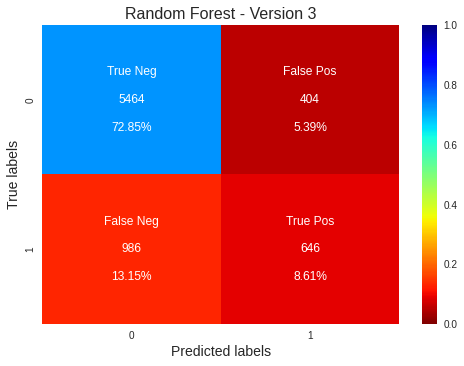

In [36]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

group_counts = ["{:0.0f}".format(value) for value in cf_rf.flatten()]

group_percentage = ["{0:0.2%}".format(value) for value in cf_rf.flatten()/np.sum(cf_rf)]

labels = [f"{v1}\n\n{v2}\n\n{v3}" for v1,v2,v3 in zip(group_names, group_counts, group_percentage)]

labels = np.asarray(labels).reshape(2,2)

ax = plt.subplot()



sns.heatmap(cf_rf/np.sum(cf_rf), annot=labels, fmt='', cmap = 'jet_r', vmin = 0, vmax = 1, ax = ax)

ax.set_xlabel('Predicted labels', fontsize = 14)
ax.set_ylabel('True labels', fontsize = 14)

plt.title("Random Forest - Version 3", fontsize = 16)

plt.show()

# KNN

In [37]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
v3_knn = knn.predict(x_test)

In [38]:
version3_accuracy.append( accuracy_score(y_test, v3_knn) )
version3_recall.append( recall_score(y_test, v3_knn, pos_label='1') )

In [39]:
print(classification_report(y_test, v3_knn))

              precision    recall  f1-score   support

           0       0.83      0.63      0.71      5868
           1       0.28      0.53      0.37      1632

    accuracy                           0.61      7500
   macro avg       0.56      0.58      0.54      7500
weighted avg       0.71      0.61      0.64      7500



In [43]:
cf_knn = confusion_matrix(y_test, v3_knn)

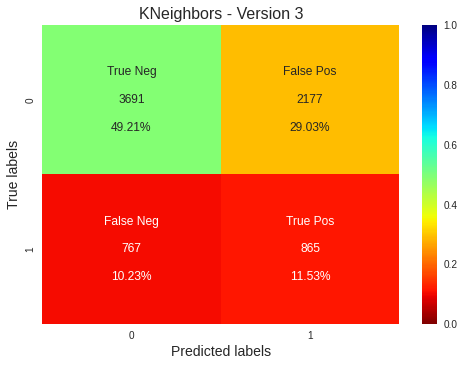

In [44]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

group_counts = ["{:0.0f}".format(value) for value in cf_knn.flatten()]

group_percentage = ["{0:0.2%}".format(value) for value in cf_knn.flatten()/np.sum(cf_knn)]

labels = [f"{v1}\n\n{v2}\n\n{v3}" for v1,v2,v3 in zip(group_names, group_counts, group_percentage)]

labels = np.asarray(labels).reshape(2,2)

ax = plt.subplot()



sns.heatmap(cf_knn/np.sum(cf_knn), annot=labels, fmt='', cmap = 'jet_r', vmin = 0, vmax = 1, ax = ax)

ax.set_xlabel('Predicted labels', fontsize = 14)
ax.set_ylabel('True labels', fontsize = 14)

plt.title("KNeighbors - Version 3", fontsize = 16)

plt.show()

# Saving and storaging the results

In [45]:
accuracy = pd.read_csv('accuracy_versions.csv')
recall = pd.read_csv("recall_versions.csv")

accuracy

,Algorithms,Version 1,Version 2
0,Decision Tree,0.733600,0.818782
1,Random Forest,0.819067,0.817401
2,KNN,0.762133,0.770861


In [46]:
recall

,Algorithms,Version 1,Version 2
0,Decision Tree,0.409314,0.358220
1,Random Forest,0.368260,0.359337
2,KNN,0.194240,0.097050


In [47]:
accuracy['Version 3'] = version3_accuracy
recall['Version 3'] = version3_recall

In [48]:
accuracy

,Algorithms,Version 1,Version 2,Version 3
0,Decision Tree,0.733600,0.818782,0.721333
1,Random Forest,0.819067,0.817401,0.814667
2,KNN,0.762133,0.770861,0.607467


In [49]:
recall

,Algorithms,Version 1,Version 2,Version 3
0,Decision Tree,0.409314,0.358220,0.411152
1,Random Forest,0.368260,0.359337,0.395833
2,KNN,0.194240,0.097050,0.530025


In [50]:
accuracy.to_csv("accuracy_versions.csv", index=None)

recall.to_csv("recall_versions.csv", index = None)